[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ClimateMatchAcademy/course-content/blob/main/tutorials/W2D5_ClimateResponse-AdaptationImpact/W2D5_Tutorial1.ipynb) &nbsp; <a href="https://kaggle.com/kernels/welcome?src=https://raw.githubusercontent.com/{ORG}/course-content/main/tutorials/W2D5_ClimateResponse-AdaptationImpact/W2D5_Tutorial1.ipynb" target="_parent"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" alt="Open in Kaggle"/></a>

# **Tutorial 1: Linear and Logistic Regression**

**Week 2, Day 5: Adaptation and Impact**

__Content creators:__ Deepak Mewada, Grace Lindsay

__Content reviewers:__ Dionessa Biton, Younkap Nina Duplex, Sloane Garelick, Zahra Khodakaramimaghsoud, Xiaomei Mi, Peter Ohue, Jenna Pearson, Derick Temfack, Peizhen Yang, Cheng Zhang, Chi Zhang, Ohad Zivan

__Content editors:__ Jenna Pearson, Chi Zhang, Ohad Zivan

__Production editors:__ Wesley Banfield, Jenna Pearson, Chi Zhang, Ohad Zivan

**Our 2023 Sponsors:** NASA TOPS and Google DeepMind


# **Tutorial Objectives**

Welcome to the first tutorial in a series that explores the role of data science and machine learning in addressing and adapting to climate change.

This tutorial focuses on regression techniques, including linear and logistic regression, and teaches how to use these techniques to model data. By the end of this tutorial, you will be able to:

- Understand linear and logistic regression models
- Implement regression using scikit-learn in Python
- Analyze model performance on synthetic data
- Appreciate the importance of cautious assumptions when using models to analyze new data

This tutorial serves as a foundation for upcoming tutorials in the series, where we will explore other data modeling techniques and compare their performance on climate and environmental data. Specifically, in the upcoming tutorials, we will:

- Learn about decision trees in Tutorial 2 and apply them to the public 'dengue fever dataset', comparing their performance to linear regression.
- In Tutorial 3, we will explore the 'Remote sensing crops dataset' and apply - Artificial Neural Networks (ANN) to it, comparing their performance to logistic regression.
- Tutorial 4 will cover identifying additional datasets and ideas.



# **Setup**

In [2]:
# imports
import numpy as np  # import the numpy library as np - used for array computing and linear algebra operations
from sklearn.linear_model import LinearRegression  # import the LinearRegression class from the sklearn.linear_model module - used for performing linear regression analysis
import matplotlib.pyplot as plt  #i mport the pyplot module from the matplotlib library - used for data visualization
from sklearn.linear_model import LogisticRegression  # import the LogisticRegression class from the scikit-learn linear_model module - used for logistic regression analysis
from sklearn.metrics import confusion_matrix  # import the confusion_matrix function from the scikit-learn metrics module - used for evaluating classification model performance

In [4]:
# @title Figure Settings
import ipywidgets as widgets       # interactive display
plt.style.use("https://raw.githubusercontent.com/ClimateMatchAcademy/course-content/main/cma.mplstyle")
%matplotlib inline


In [5]:
# @title Video 1: Speaker Introduction
#Tech team will add code to format and display the video

# **Section 1: Linear Regression**

Regression analysis is a powerful tool used in climate science to model relationships between various environmental factors. In this tutorial, we will cover two types of regression: linear and logistic regression.

In a regression problem, we need data features ('regressors', or independent variables) that we will use to predict a dependent variable. For example, we could try to predict the amount of carbon dioxide released into the atmosphere (dependent variable) based on features such as electricity use and flights taken (regressors). We can use linear regression to model this relationship by fitting a straight line through the data points.

To try out linear regression with scikit-learn, we will start with synthetic data. Linear regression assumes there is a linear relationship between the regressors and the predicted value, so we will simulate data that does have such a linear relationship. Specifically, we will build data with the following relationship:
\begin{align}
 y = \beta x_1 + (1-\beta) x_2 + \alpha \epsilon 
\end{align}

where :
* y is the dependent variable
* x<sub>1</sub> and x<sub>2</sub> are regressors 
* $\beta$ can range from 0 to 1; it is a weighting variable that controls the relative influence from each regressor (at .5, both regressors contribute equally). 
* $\epsilon$ is a noise term that makes y only partially dependent on these regressors. 
* The strength of the noise is controlled by $\alpha$.  

In climate science, linear regression can be used to model relationships between variables such as temperature and time, or cumulative carbon dioxide emissions and global temperature change. By analyzing the relationship between these variables, we can make predictions and gain a better understanding of the climate system.

Before we work with real data, let's start by creating some synthetic values for the regressors and practice using the technique.


## **Section 1.1:  Generating a Synthetic Dataset**

This code generates two arrays of random numbers with mean 0 using the numpy library's random module. The `data_points` variable is used to define the length of the generated arrays, and the `random.randn()` function is used twice to generate the two arrays that we will use as our two regressors. The numpy library was previously imported and given the alias "np" for ease of use.

In [6]:
# generating regressors values 'x1' and 'x2' with NumPy

# importing the numpy library with the alias "np" earlier in the code
# Numpy is a popular library used for numerical computing and mathematical operations in Python

data_points = 100   # defining the number of data points to generate

x_1 = np.random.randn(data_points)   # generating an array of 'data_points' numbers from a normal distribution with zero mean using numpy's 'random.randn()' function, and saving it to 'x_1'
# 'random.randn()' function is a part of numpy's random module and generates an array of random numbers from a standard normal distribution (mean = 0, standard deviation = 1)

x_2 = np.random.randn(data_points)   # generating another array of 'data_points' numbers from a normal distribution with zero mean using numpy's 'random.randn()' function, and saving it to 'x_2'
# we are again using the 'random.randn()' function from numpy's random module to generate another array of random numbers from a standard normal distribution. This time we are saving it to 'x_2' variable.

# by using the numpy library's random module, we can generate random numbers efficiently, which is often useful in many scientific and engineering applications.

Now we can choose some weighting values and calculate the dependent variable:

In [7]:
# generating dependent variable  'y'


beta = .5   # defining the weight for the first regressor
alpha = .1    # defining the weight for the noise

def y_func(weights, regressors, noise):
    """
    This function takes in three inputs:
    - weights: a numpy array of weights (1 x r, where r is number of regressors)
    - regressors: a numpy array of regressors (r x d, where d is number of datapoints)
    - noise: a scalar value representing the amount of noise to be added to the output.

    The function returns the dot product of 'weights' and 'regressors', plus some added noise (controlled by 'noise').
    """
    # The dot product of weights and regressors is calculated using numpy's 'dot' function. Then, noise is added to the result using numpy's 'random.randn()' function.
    return np.dot(weights, regressors) + noise * np.random.randn(regressors.shape[1])

# calling the function 'y_func' to generate 'y', using the variables 'alpha', 'beta', and 'x_1', 'x_2' that were previously defined.
y = y_func(np.array([beta, 1-beta]), np.array([x_1, x_2]), alpha)
print(y)

[ 0.65279306  0.06146733 -1.30876351  0.00539388 -0.97196901 -0.80077671
 -0.72933912 -1.01446061 -0.49556655  0.74082371  1.58692099 -1.52014196
 -1.12389341 -0.12218408  0.08977937 -1.23493151 -0.04294189  0.10425073
  0.01153799 -1.24553777  0.2463641  -0.08988756  1.34009601 -1.23190051
 -0.34319648 -0.11549783 -0.31769268  0.02899521  0.47226235 -0.06042409
  0.57338973  0.51923357  0.41870486 -1.05412857  0.46991903 -0.49322091
  0.15473547 -0.51822852  0.77650936 -1.01062166  0.84772628  1.12041537
  0.0113216  -0.650321   -0.09876298  0.54103278  0.76554008  0.96752085
  0.56731448 -1.1889665   0.2196404  -0.96511958  1.05712926  0.19577655
  0.72863885 -0.01983855 -0.96874564  0.64610604  0.24571549 -0.37981452
  1.72972788 -1.11616954 -0.84539959  0.71050637  0.3327157   0.39997873
  0.33654024  0.23998765 -0.25619091  0.22199078 -0.13018035 -0.19406588
  1.11764896  0.4453694  -1.50301351 -0.58983899  0.10651884 -0.02957562
 -1.059416    0.40452383 -1.50511187 -0.12120616  0

The code generates a dependent variable 'y' by calling a function 'y_func()'. The function takes in weights, regressors, and noise as inputs, calculates the dot product of weights and regressors using numpy's 'dot' function, adds noise to the result using numpy's 'random.randn()' function, and returns the final result. The 'y_func()' function is called using previously defined variables 'beta', 'alpha', and 'x_1', 'x_2'.

### Section 1.1.1 **Plotting the Data**

To fully understand what this function represents, we can plot the relationship between the regressors and y. Change the values of $\alpha$ and $\beta$ and see how it impacts these plots. 

Text(0.5, 0.98, 'Scatter plots of y against x_1 and x_2')

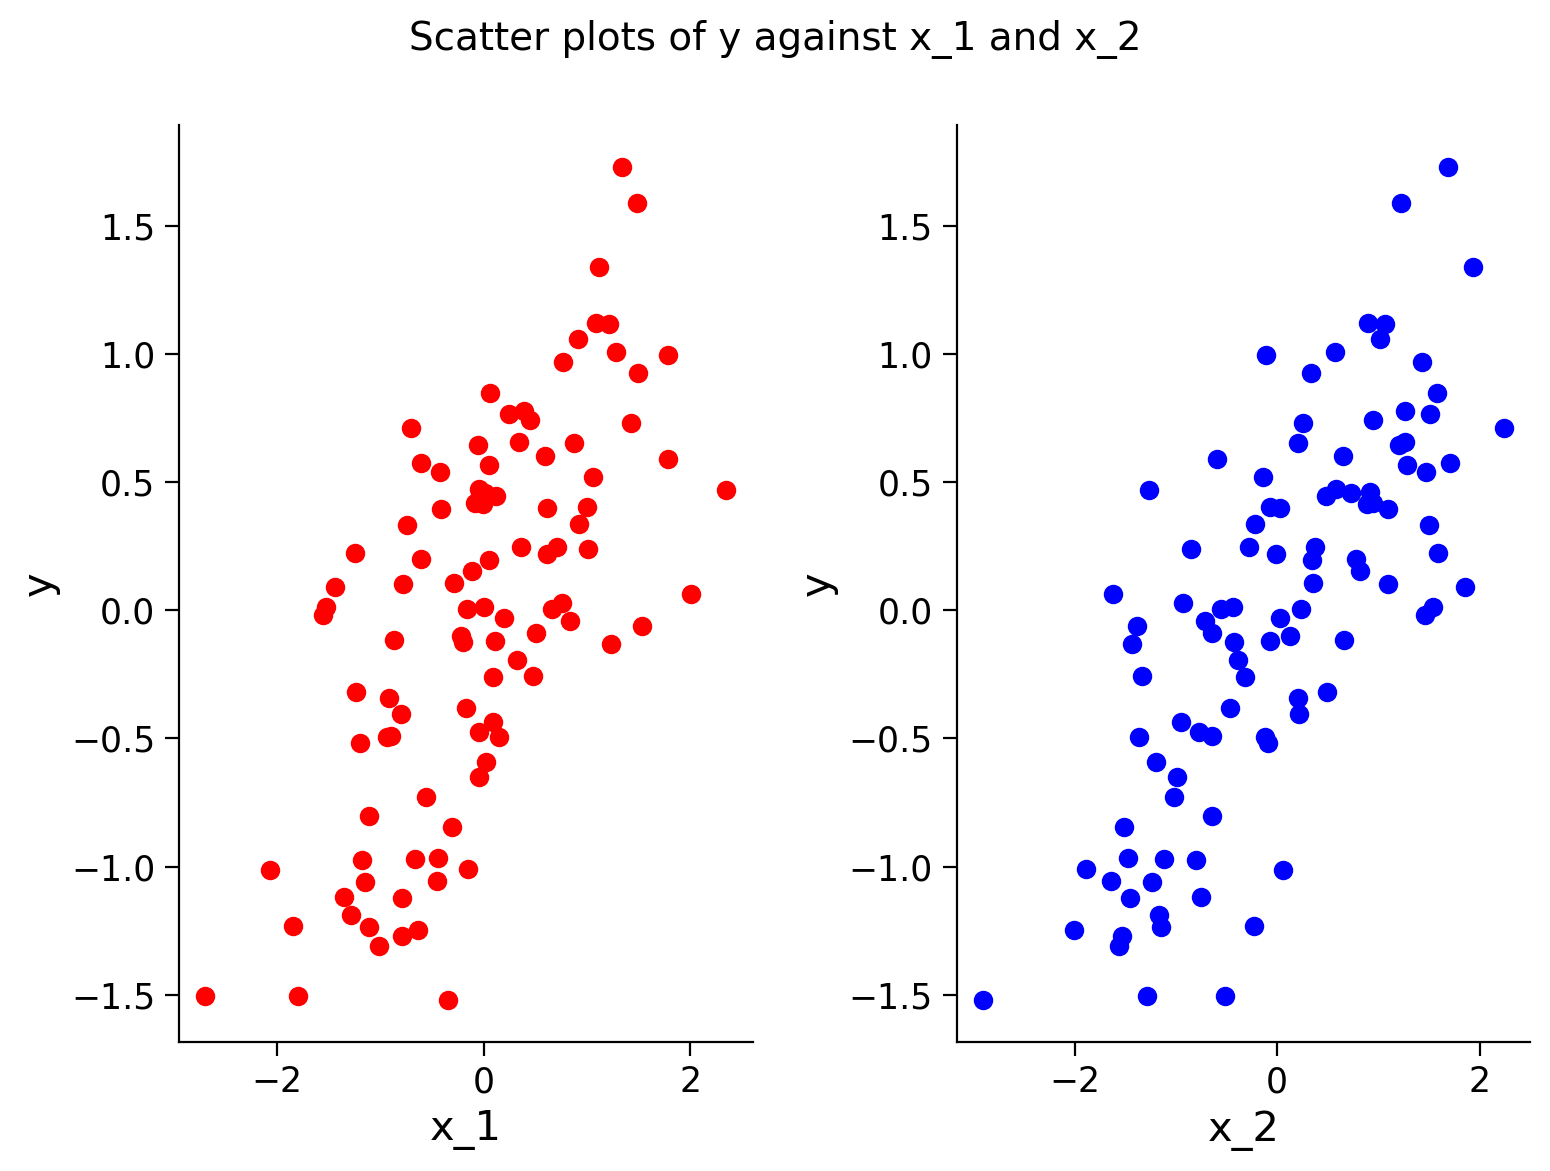

In [9]:
# creating a figure with two subplots
fig,ax=plt.subplots(1, 2)     # the first subplot
ax[0].scatter(x_1, y, c='r')   # creating a scatter plot of x_1 vs. y, with the color 'red'
ax[0].set_ylabel('y')              # adding a y-axis label to the plot
ax[0].set_xlabel('x_1')            # adding an x-axis label to the plot

ax[1].scatter(x_2, y, c='b')   # creating a scatter plot of x_2 vs. y, with the color 'blue'
ax[1].set_ylabel('y')              # adding a y-axis label to the plot
ax[1].set_xlabel('x_2')            # adding an x-axis label to the plot

fig.suptitle('Scatter plots of y against x_1 and x_2', fontsize=14)  # adding a title to the overall figure


## **Section 1.2: Fitting Model and Analyzing Results**

Now we can test if linear regression can find these relationships between the regressors and the dependent variable, and use it to predict $y$ values from new $x$ values. Let's start by making a dataset with $\beta=.8$ and $\alpha=.1$:

In [10]:
beta = .8   # defining the weight for the first regressor
alpha = .1    # defining the weight for the noise
regressors = np.array([x_1, x_2])   # creating an array of regressors (x_1 and x_2)

# calling the function 'y_func' to generate 'y', using the variables 'alpha', 'beta', and 'regressors' that were previously defined.
y = y_func(np.array([beta, 1-beta]), regressors, alpha)


Then we can train a linear regression model. In scikit-learn, models are objects. So we first define a linear regression object and then train it with our synthetic data. 

In [11]:
# here we will use 'LinearRegression' from 'sklearn.linear_model' which we imported earlier

reg_model = LinearRegression()   # creating a new instance of the LinearRegression class and assigning it to the variable 'reg_model'

# training the model using the fit() method of the LinearRegression class
reg_model.fit(regressors.T, y)
# note that the regressors are transposed using the .T method to conform to the scikit-learn convention of having datapoints as rows and regressors as columns

LinearRegression()

The model has now been trained with our synthetic data. But we want to see if it has done a good job finding the relationships between these variables. 

We will first evaluate the coefficient of determination of the model fit. This is a measure of how much of the variability in the data the model has captured. It is also known as $R^2$ ("R-squared"). 1 is the best possible value. 

We will also look at the coefficients that the model has learned for each regressor.

In [12]:
reg_model.score(regressors.T, y)   # calling the score() method of the LinearRegression class on the trained model 'reg_model' to get the coefficient of determination

0.9844200204276019

In [13]:
reg_model.coef_   # accessing the 'coef_' attribute of the trained model 'reg_model' to get the coefficients (or weightings) of each regressor

array([0.77960074, 0.2120995 ])

As we can see, the model has a high coefficient of determination and does a good job of recovering the regressor weights (which we had set to .8 and 1 - .8 = .2). You can increase the amount of noise in the data and see how this impacts these results. 


It is important to evaluate the performance of a model on new data that it hasn't seen before, as this can provide a good indication of how well it can generalize to unseen situations. Here, we can create two new data sets and test how well the trained linear regression model performs on them. In the first set, we can keep the relationship between the input variables and output variable the same, but sample new input values.

## **Section 1.3: Test the Model on New Unseen x Values**

0.9865052496849113

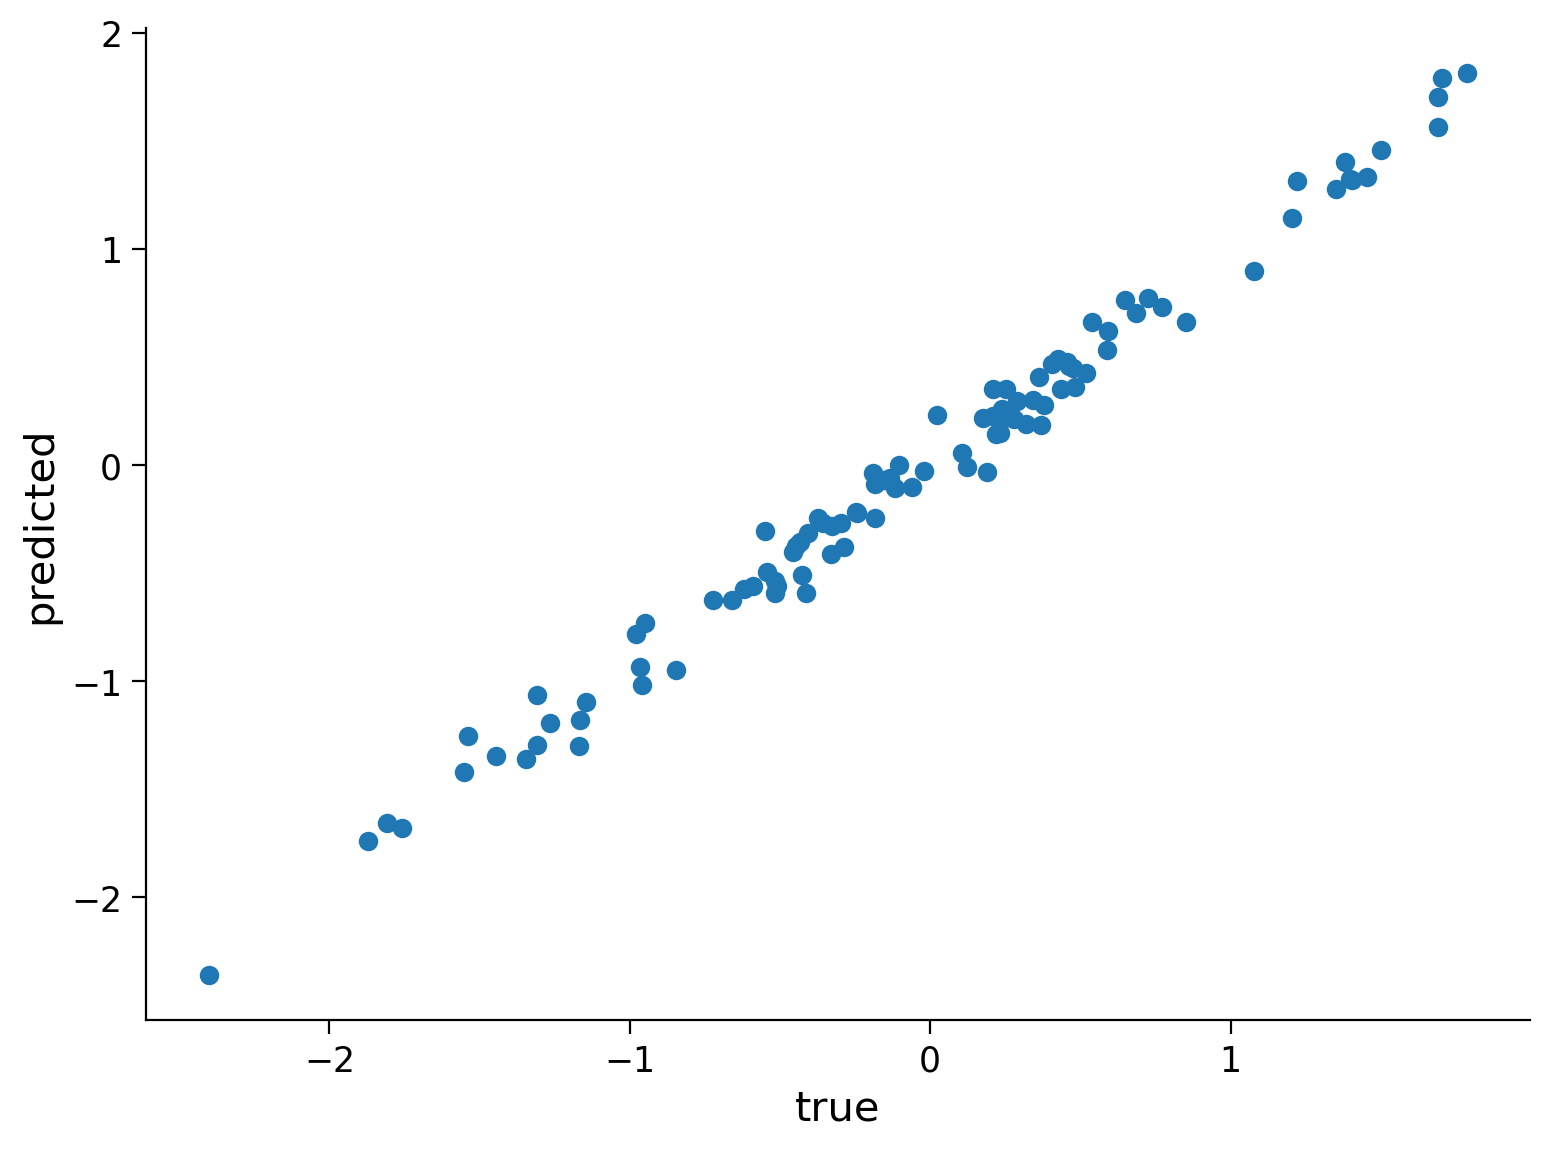

In [15]:
x_1_test1 = np.random.randn(data_points)   # creating a new array of x_1 values using the same normal distribution as before
x_2_test1 = np.random.randn(data_points)   # creating a new array of x_2 values using the same normal distribution as before

# creating a new array of regressors (x_1_test1 and x_2_test1) to test the model's predictions
regressors_test1 = np.array([x_1_test1, x_2_test1])

# getting the model's predictions on the new x values by calling the predict() method of the LinearRegression object
preds_test1 = reg_model.predict(regressors_test1.T)

# assuming the same relationship of beta=.8 and alpha=.1 as set above, we can calculate the true y values
y_test1 = y_func(np.array([beta, 1-beta]), regressors_test1, alpha)

# visualizing how aligned the predicted and true values are by creating a scatter plot
fig,ax=plt.subplots()
ax.scatter(y_test1, preds_test1)
ax.set_xlabel('true'); plt.ylabel('predicted')

# calculating the coefficient of determination (R^2) using the score() method of the LinearRegression object
reg_model.score(regressors_test1.T, y_test1)

As the plot and the coefficient of determination show, the linear regression model performs well on this synthetic classification data. However, in real-world climate science problems, the relationship between input variables and output can change over time due to various factors like climate change, natural disasters, and human activities. Therefore, it is important to carefully consider the potential changes in the relationship between input variables and output when training models and evaluating their performance on new data.

## **Section 1.4: Check the Model on a New Dataset With a Slightly Different Relationship**

0.8376866856278035

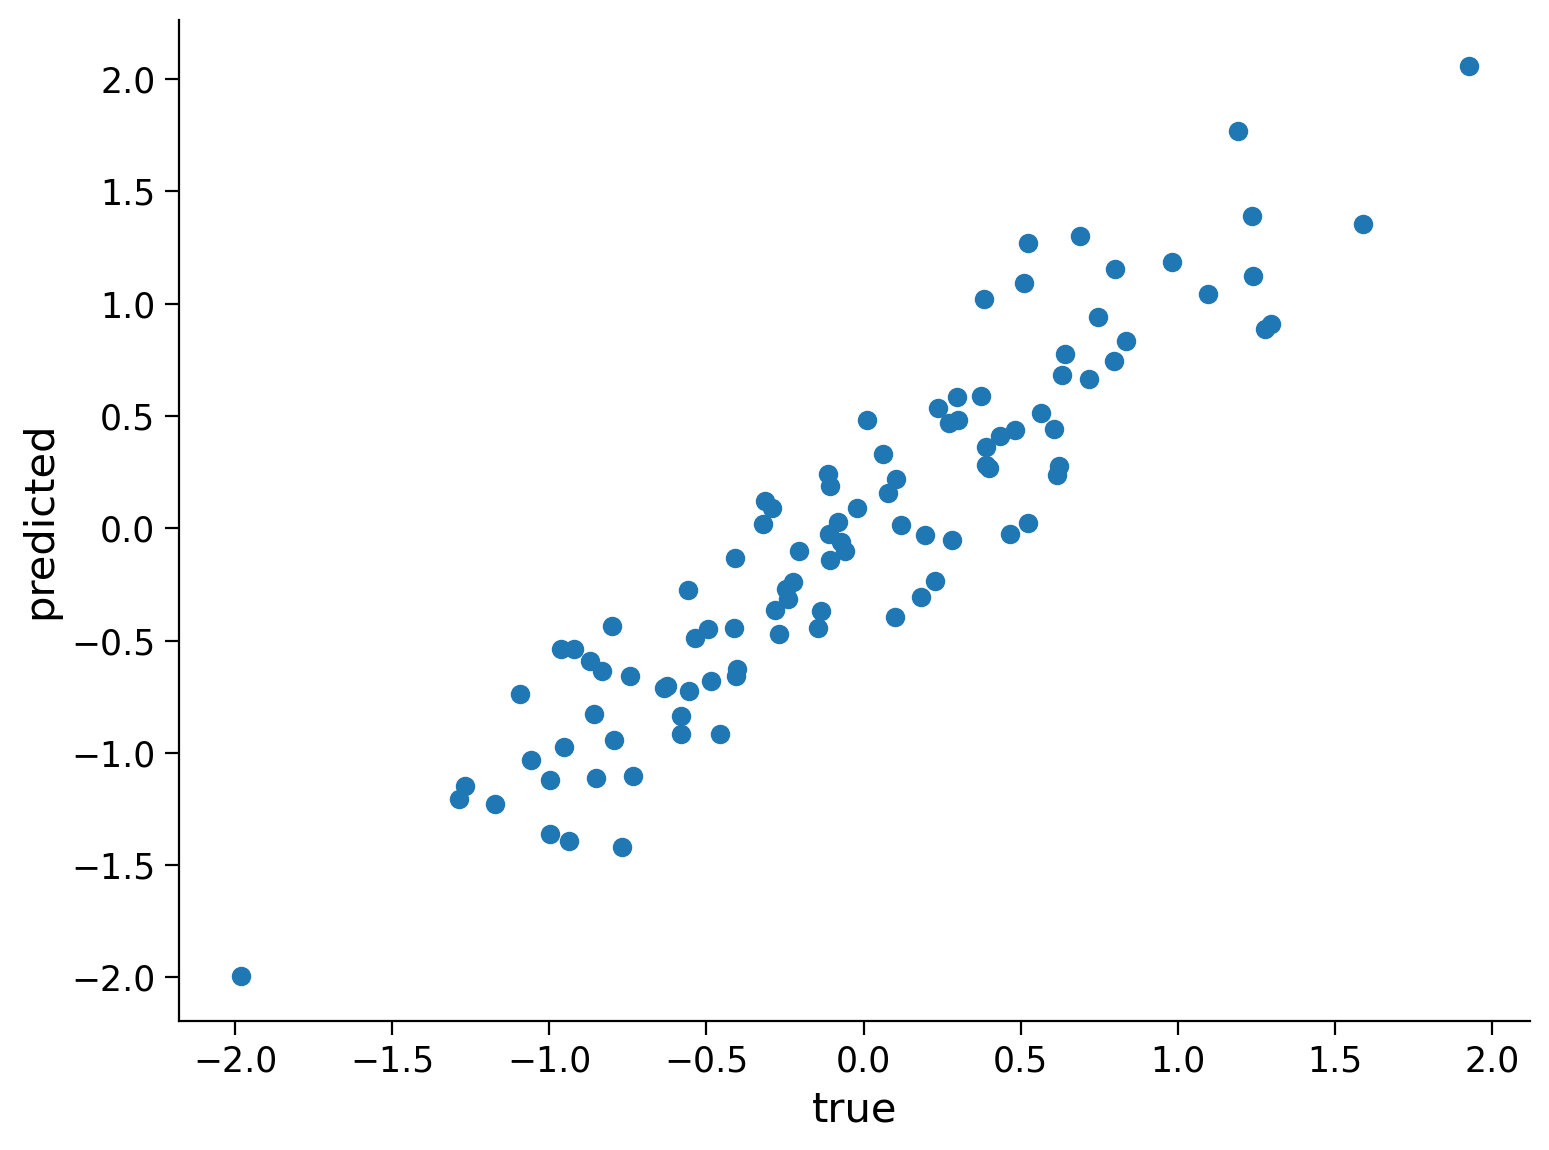

In [16]:
# generate new test data
x_1_test2 = np.random.randn(data_points)
x_2_test2 = np.random.randn(data_points)

# get the model's predictions on these new x values
regressors_test2 = np.array([x_1_test2, x_2_test2])
preds_test2 = reg_model.predict(regressors_test2.T)

# assuming a different relationship (beta = .6), we can calculate the true y values:
beta = .6
y_test2 = y_func(np.array([beta, 1-beta]), regressors_test2, alpha)

fig,ax=plt.subplots()
ax.scatter(y_test2, preds_test2) # visualizing how aligned the predicted and true values are
ax.set_xlabel('true'); plt.ylabel('predicted')
reg_model.score(regressors_test2.T, y_test2) #coef of determination

Now the model does not perform as well. 

The concept of a model performing well on the data it was trained on but not generalizing well to new data is a fundamental concept in machine learning. It is particularly important to consider this when applying machine learning to climate science problems. Climate data is complex, and a model that performs well on historical climate data may not necessarily generalize well to future climate conditions. Therefore, it is crucial to be cautious when making claims about the performance and usefulness of machine learning models in different climate scenarios.

Congratulations!!! You have completed the first section of this tutorial where we covered the basics of linear regression. Moving forward, we will dive into another powerful form of regression known as 'Logistic Regression'. Stay tuned and get ready to take your regression analysis to the next level!

# **Section 2: Logistic Regression**

In this section, we will learn to implement Logistic Regression. Specifically, by the end of this Section, you will be able to:

- Implement logistic regression to classify using scikit learn
- Evaluate the performance of the learned model
- Understand how the learned model behaves on new unseen data with the same and different relationsip

Logistic regression can be useful in climate science for predicting the probability of occurrence of events such as extreme weather conditions or classifying land use changes in satellite data.


Logistic regression is a statistical method used to model the probability of a binary outcome (e.g., success/failure, yes/no) as a function of one or more predictor variables. As such, it can be used to model binary outcomes such as whether a particular region will experience drought or not.

Logistic regression is built on the same principles as linear regression, but it can be applied to classification problems instead of just regression. The equation for logistic regression is as follows:

\begin{equation}
p = S(\beta x_1 + \beta x_2 + \epsilon)
\end{equation}

where:

* $p$ represents the probability of an event occurring (e.g., precipitation exceeding a certain threshold).
* $S$ is the sigmoid function, which maps any real-valued number to a probability between 0 and 1.
* $\beta$ represents the regression coefficient or weight associated with each predictor variable ($x_1$ and $x_2$) in the model. It indicates the direction and strength of the relationship between the predictor and the outcome variable. For example, a positive $\beta$ value for $x_1$ means that an increase in $x_1$ is associated with an increase in the probability of the event occurring.
* $\epsilon$ represents the noise or error term, which, like with linear regression, captures the unexplained variation in the outcome variable that is not accounted for by the predictor variables. It includes measurement error and any other factors that are not included in the model.

In the context of climate science, logistic regression can be used to model the probability of an extreme weather event (e.g., heatwave, drought, flood) occurring based on various climatic factors (e.g., temperature, precipitation, humidity). By fitting a logistic regression model to the data, we can estimate the impact of each predictor variable on the probability of the event occurring, and use this information to make predictions about future events.
In order to perform binary classification, we map the probability value to 0 or 1. To do that, we simply apply a threshold of .5 (i.e., if $p<.5$ then the input is labeld as belonging to category 0). 

## **Section 2.1:  Generating the Synthetic Data**

As we did in the previous tutorial on linear regression, we will generate synthetic data in a similar way.

In [17]:
# generate synthetic classification data

data_points = 100  # set the number of data points to be generated
x_1 = np.random.randn(data_points)  # generate random values for the first regressor using a normal distribution
x_2 = np.random.randn(data_points)  # generate random values for the second regressor using a normal distribution

beta = .5  # set a weight for the first regressor
alpha = .1  # set a weighting factor for the noise

# define a sigmoid function that takes in an input and returns the output of the sigmoid function.
# the sigmoid function is used to transform the input to a value between 0 and 1.
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# define a function that computes the output values for a synthetic classification problem, given input weights, regressors, and noise.
def y_func(weights,regressors,noise):
    """
    This function computes the output values for a synthetic classification problem, given input weights, regressors, and noise.

    Parameters:
    weights (numpy array): A 1 x r array of weights, where r is the number of regressors
    regressors (numpy array): An r x d array of regressors, where d is the number of data points
    noise (scalar): A scalar value for the weighting of the noise added to the output values

    Returns:
    numpy array: A 1 x d array of output values computed using the input weights, regressors, and noise
    """
    # compute the dot product of the input weights and regressors and add noise to it.
    # then, apply the sigmoid function to the result to obtain a value between 0 and 1.
    # finally, round the result to the nearest integer to obtain the output class label (0 or 1).
    y = sigmoid(np.dot(weights,regressors) + noise*np.random.randn(regressors.shape[1]))
    y = (y>0.5).astype(int)
    return  y

# generate the output values for the synthetic classification problem using the y_func function.
# the input weights and regressors are set to beta and 1-beta for x_1 and x_2, respectively.
# the noise term is set to alpha.
y = y_func(np.array([beta,1-beta]),np.array([x_1,x_2]),alpha)
y

array([1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1])

Text(0, 0.5, 'x_2')

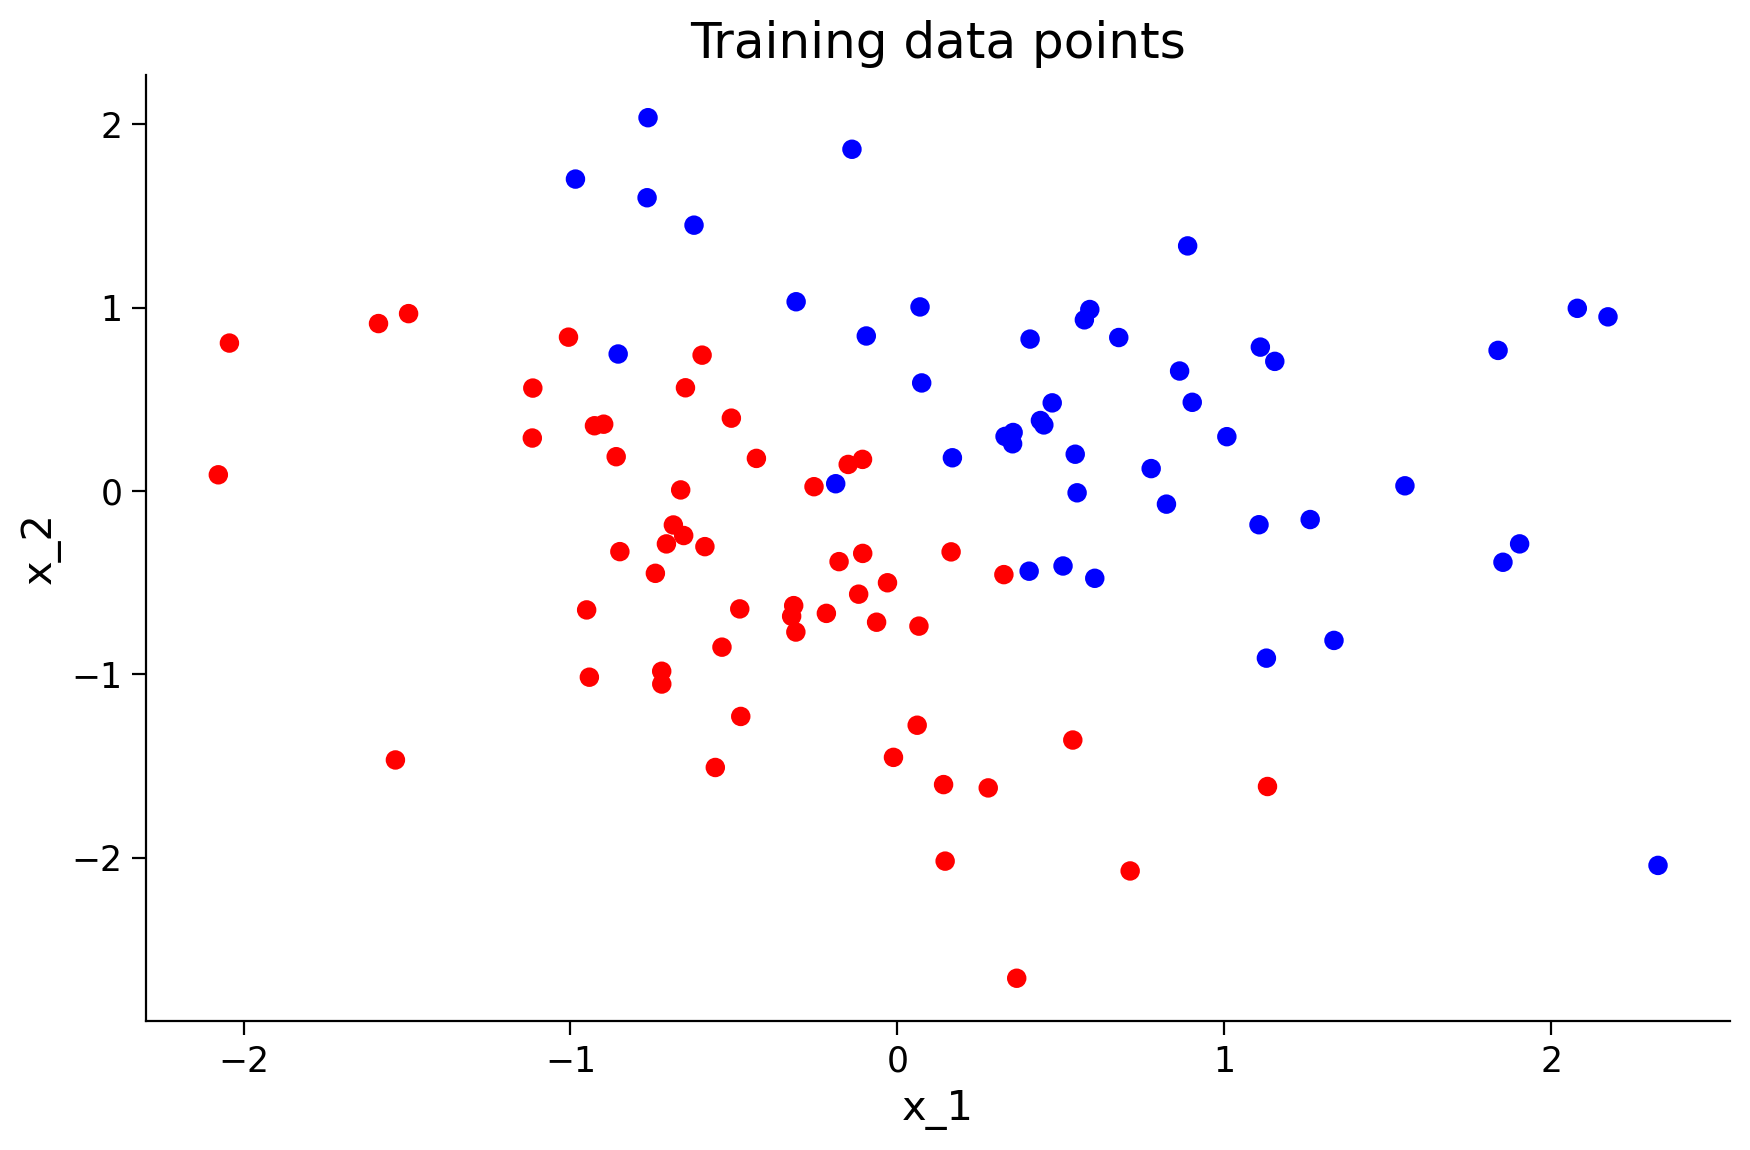

In [21]:
# visualise the data
from matplotlib.colors import ListedColormap
colors = ['#FF0000', '#0000FF'] # colors for each category
cmap = ListedColormap(colors)

# plot the data points
fig,ax=plt.subplots(figsize=(9,6))
ax.scatter(x_1, x_2, c=y, cmap=cmap)
ax.set_title('Training data points')
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')

## **Section 2.2 Fitting the Model and Analyzing Results**

Just as with linear regression, we will use the sklearn object to build a logistic regression model.


In [22]:
# logistic regression model building

logreg_model = LogisticRegression()  # initialize the logistic regression model object
regressors = np.array([x_1,x_2])  # create a numpy array called regressors to hold the input variables (x_1 and x_2)
logreg_model.fit(regressors.T,y)  # fit the logistic regression model using the input variables and output variable (y)

LogisticRegression()

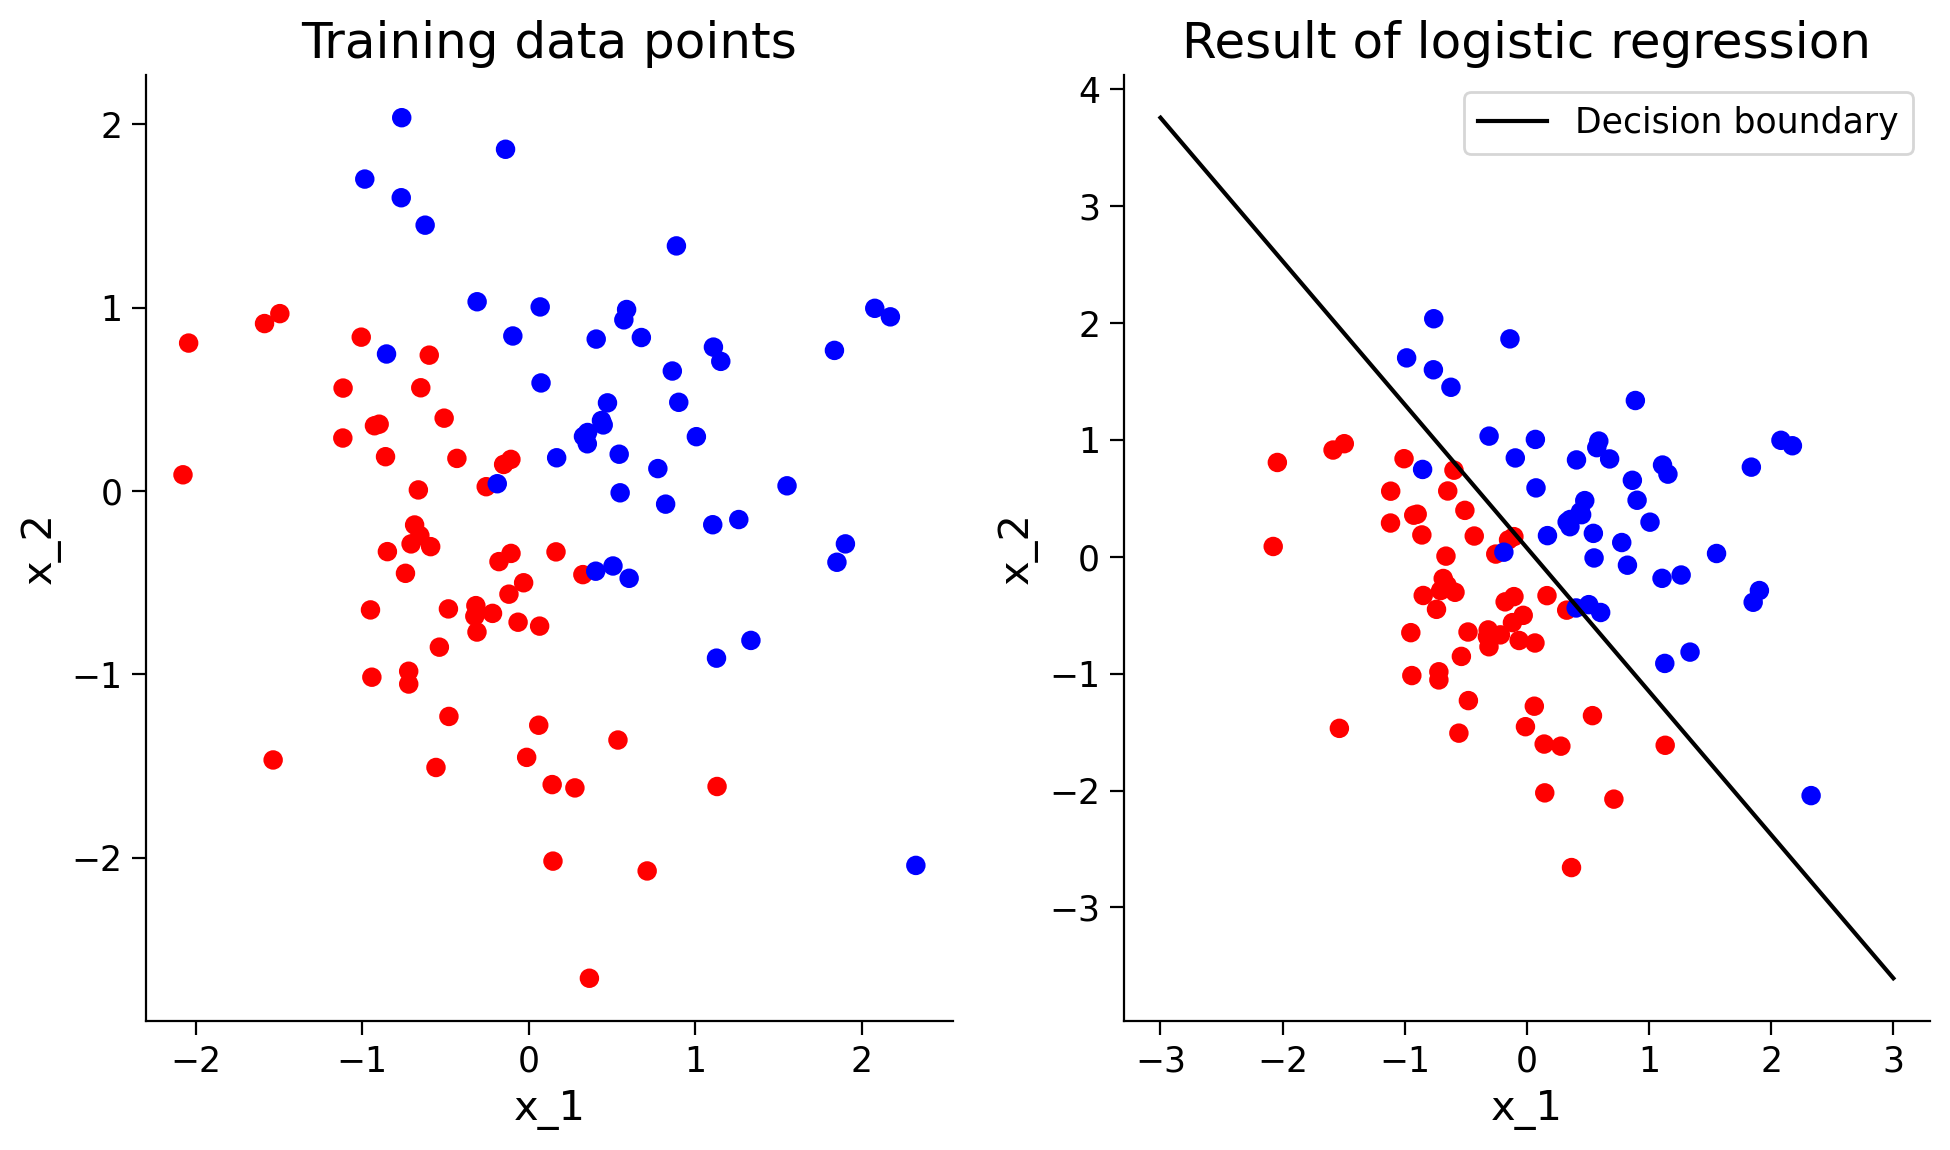

In [24]:
# visualize the decision boundary before and after applying regression

from matplotlib.colors import ListedColormap
colors = ['#FF0000', '#0000FF']
cmap = ListedColormap(colors)

# plot the data points
fig,ax=plt.subplots(1,2,figsize=(10,6))
ax[0].scatter(x_1, x_2, c=y, cmap=cmap)
ax[0].set_title('Training data points')
ax[0].set_xlabel('x_1')
ax[0].set_ylabel('x_2')

# compute the decision boundary
w = logreg_model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-3, 3)
yy = a * xx - (logreg_model.intercept_[0]) / w[1]

# plot the data points with the decision boundary
ax[1].scatter(x_1, x_2, c=y, cmap=cmap)
ax[1].plot(xx, yy, 'k-', label='Decision boundary')
ax[1].set_title('Result of logistic regression')
ax[1].set_xlabel('x_1')
ax[1].set_ylabel('x_2')
ax[1].legend()



Once the logistic regression model is trained, its performance can be evaluated using classification-specific metrics. For instance, a **confusion matrix** can be plotted to show the number of data points of each category that are classified as different categories. The overall accuracy of the model can also be calculated to determine the percentage of data points that are correctly classified.

'Percent correct is 97.0'

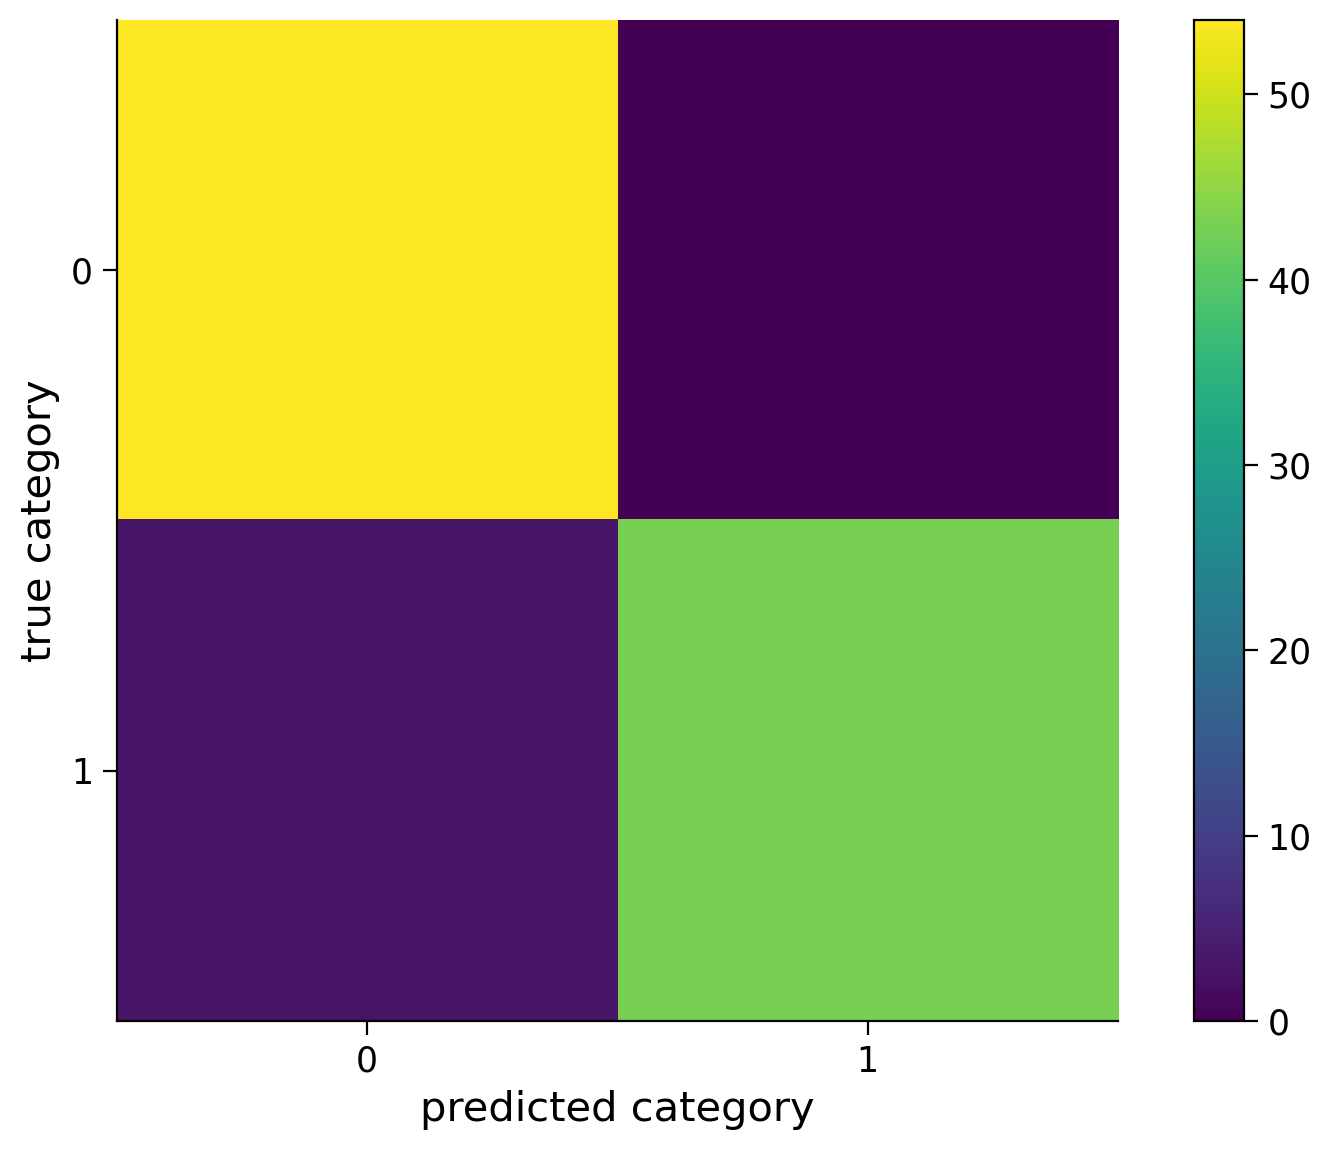

In [31]:
# prediction and evaluation of logistic regression model

preds = logreg_model.predict(regressors.T)  # predict the output using the logistic regression model and input variables
cm = confusion_matrix(y, preds)  # compute the confusion matrix using the predicted and actual output values
fig,ax=plt.subplots()
im=ax.imshow(cm)
ax.set_xticks([0,1])
ax.set_yticks([0,1])  # plot the confusion matrix using pyplot
ax.set_ylabel('true category'); ax.set_xlabel('predicted category')  # add x and y axis labels
fig.colorbar(im)  # add colorbar to the plot (assign im to know on what color to base it)

'Percent correct is ' + str(100*logreg_model.score(regressors.T, y))  # compute the percentage of correct predictions using the logistic regression model and input/output variables

<details>
<summary> <font color='orangered'>Click here description of plot  </font></summary>
The plot shows a confusion matrix, which is a way of visualizing how well a classification model is performing. The rows represent the true class labels, and the columns represent the predicted class labels. The color of each cell indicates the number of instances that fall into that category. The diagonal cells indicate correct predictions, while the off-diagonal cells indicate incorrect predictions. The percentage of correct predictions by the logistic regression model is printed at the end.


As we can see, the model has a high accuracy. However, in climate science, it is important to test the performance of the model on new and unseen data to ensure its reliability and robustness. Therefore, it is essential to evaluate the model's performance on new data to make sure that it can generalize well and provide accurate predictions on different scenarios.


## **Section 2.3: Test the Model on New Unseen x Values**

### Coding Exercise 2.3

Evaluate the model performance on new unseen data.

For the first exercise, once again, like with linear regression, evaluate the model on test data it was not trained on. 

1. Create a new dataset assuming the same relationship but a different sample of x values and test the model's performance.

In [ ]:
# generate 100 numbers from a Gaussian distribution with zero mean
x_1_test1 = np.random.randn(data_points)
x_2_test1 = np.random.randn(data_points)

# create an array of x values
regressors_test1 = np.array([x_1_test1, x_2_test1])

# assuming the same relationship of beta =.5 and alpha = .1 as set above,calculate the true y values:
y_test1 = ...

# use the logistic regression model to make predictions on the new x values
preds = ...

# calculate the confusion matrix for the model's predictions
cm = ...

# visualize the confusion matrix as an image with labeled ticks
fig,ax=plt.subplots()
im=...
ax.set_xticks([0,1])
ax.set_yticks([0,1])  # plot the confusion matrix using pyplot
ax.set_ylabel('true category'); ax.set_xlabel('predicted category')  # add x and y axis labels
...

# print the percent of correct predictions by the logistic regression model
'Percent correct is ' + str(...)

'Percent correct is 98.0'

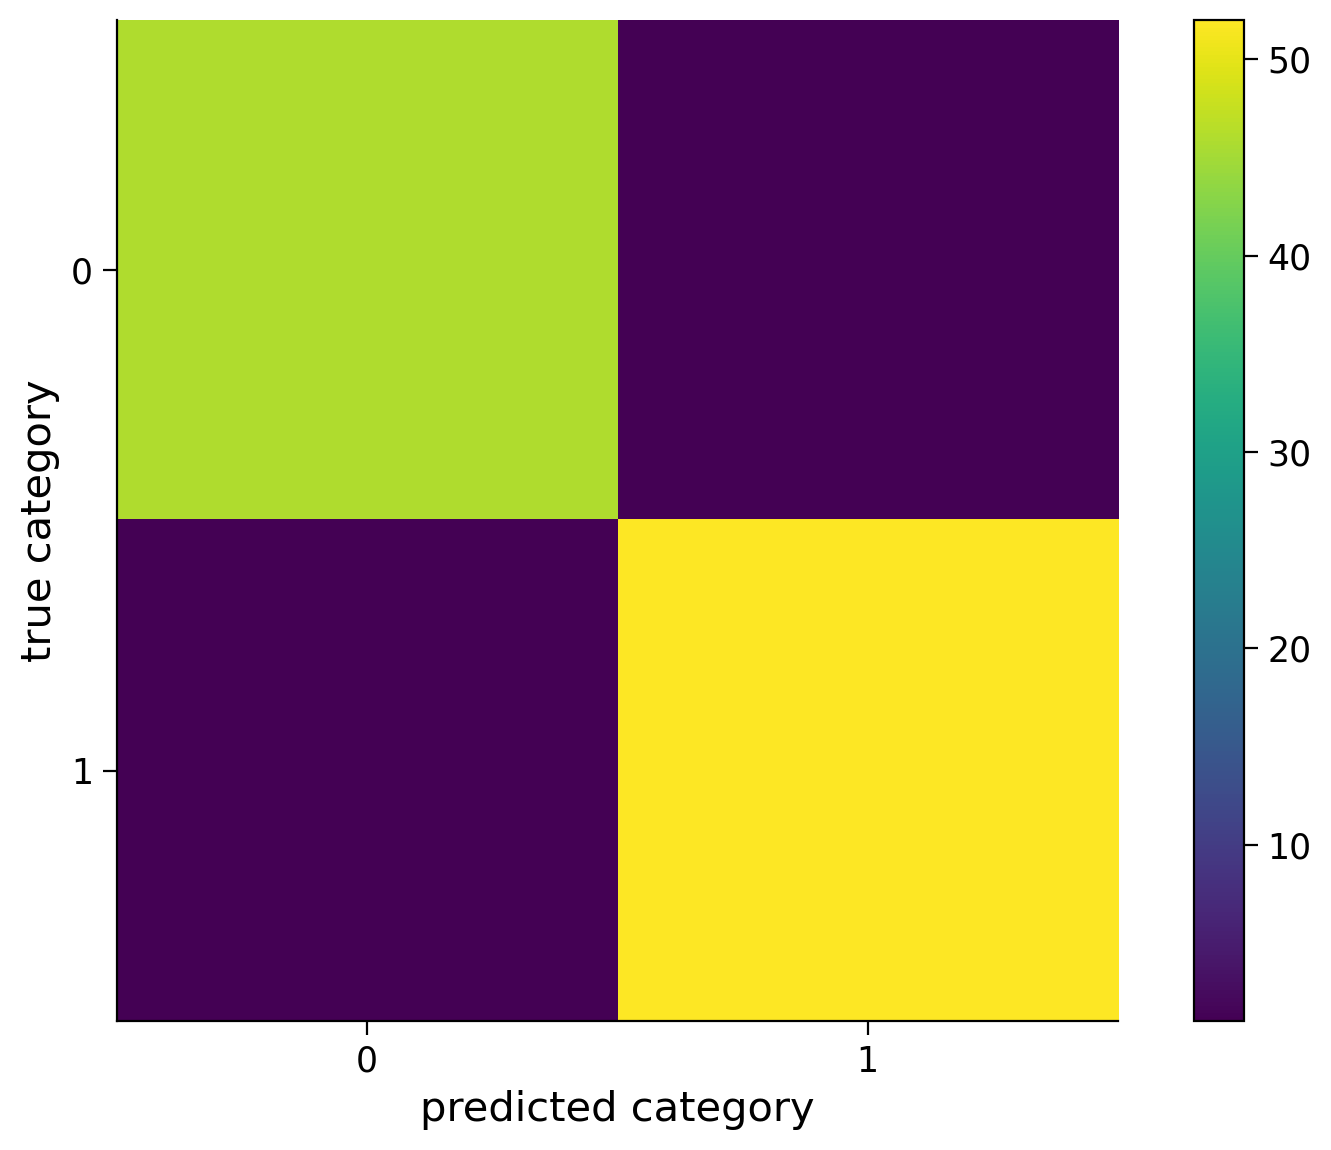

In [32]:
# to_remove solution

# generate 100 numbers from a Gaussian distribution with zero mean
x_1_test1 = np.random.randn(data_points)
x_2_test1 = np.random.randn(data_points)

# create an array of x values
regressors_test1 = np.array([x_1_test1, x_2_test1])

# assuming the same relationship of beta =.5 and alpha = .1 as set above,calculate the true y values:
y_test1 = y_func(np.array([beta, 1-beta]), regressors_test1, alpha)

# use the logistic regression model to make predictions on the new x values
preds = logreg_model.predict(regressors_test1.T)

# calculate the confusion matrix for the model's predictions
cm = confusion_matrix(y_test1, preds)

# visualize the confusion matrix as an image with labeled ticks
fig,ax=plt.subplots()
im=ax.imshow(cm)
ax.set_xticks([0,1])
ax.set_yticks([0,1])  # plot the confusion matrix using pyplot
ax.set_ylabel('true category'); ax.set_xlabel('predicted category')  # add x and y axis labels
fig.colorbar(im)  # add colorbar to the plot (assign im to know on what color to base it)

# print the percent of correct predictions by the logistic regression model
'Percent correct is ' + str(100*logreg_model.score(regressors_test1.T, y_test1))



As the plot and percent correct show, the logistic regression model performs well on this synthetic classification problem. However, in the context of climate science, it is important to consider the possibility of changes in the relationship between variables over time. For instance, climate variables such as temperature, precipitation, and atmospheric carbon dioxide concentrations are known to vary over time due to natural and anthropogenic factors.   
If such changes occur, it is important to evaluate whether the logistic regression model developed using past data still performs well on new data collected under the changed conditions.

## **Section 2.4: Check the Model on a New Dataset with a Slightly Different Relationship**

### Coding Exercise 2.4

Evaluate the model perfromance on  a new dataset with a slightly different relationship.

1. Create a new dataset assuming a different relationship and a different sample of x values and then test the model's performance.

In [ ]:
# generate 100 numbers from a Gaussian distribution with zero mean
x_1_test2 = np.random.randn(data_points)
x_2_test2 = np.random.randn(data_points)

# create an array of x values
regressors_test2 = np.array([x_1_test2, x_2_test2])

# assuming a different relationship (beta = .8), we can calculate the true y values:
beta = 0.8
y_test2 = ...

# use the logistic regression model to make predictions on the new x values
preds = ...

# calculate the confusion matrix for the model's predictions
cm = ...

# visualize the confusion matrix as an image with labeled ticks
fig,ax=plt.subplots()
im=...
ax.set_xticks([0,1])
ax.set_yticks([0,1])  # plot the confusion matrix using pyplot
ax.set_ylabel('true category'); ax.set_xlabel('predicted category')  # add x and y axis labels
...

# Print the percent of correct predictions by the logistic regression model
"Percent correct is " + str(...)

'Percent correct is 86.0'

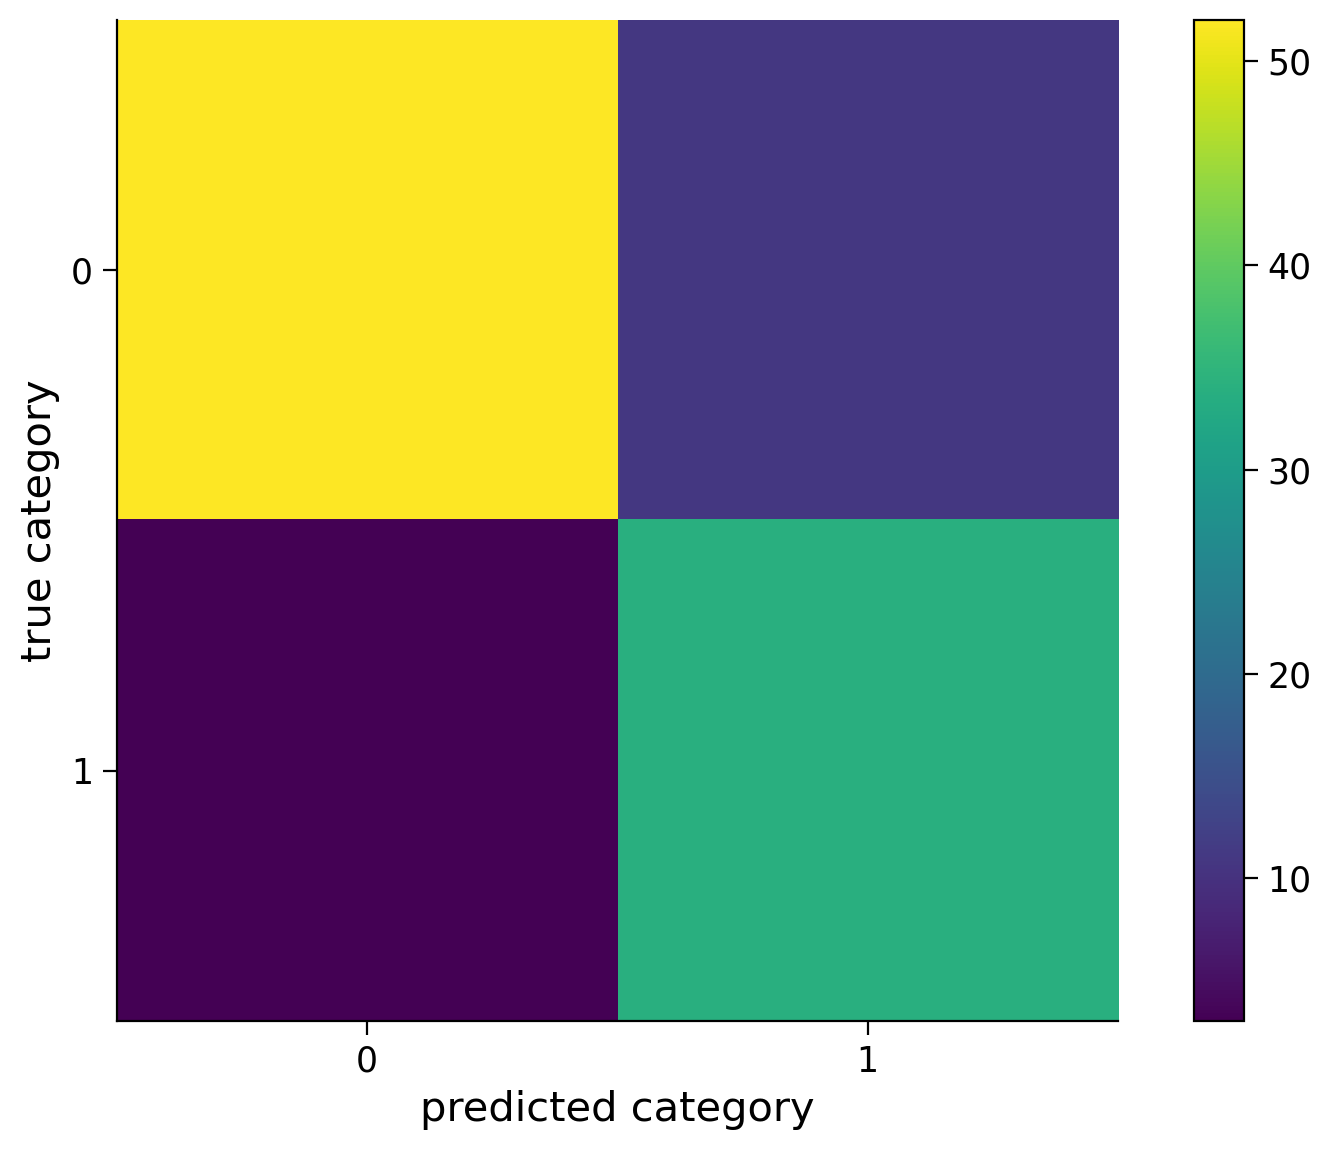

In [33]:
# to_remove solution

# generate 100 numbers from a Gaussian distribution with zero mean
x_1_test2 = np.random.randn(data_points)
x_2_test2 = np.random.randn(data_points)

# create an array of x values
regressors_test2 = np.array([x_1_test2, x_2_test2])

# assuming a different relationship (beta = .8), we can calculate the true y values:
beta = 0.8
y_test2 = y_func(np.array([beta, 1 - beta]), regressors_test2, alpha)

# use the logistic regression model to make predictions on the new x values
preds = logreg_model.predict(regressors_test2.T)

# calculate the confusion matrix for the model's predictions
cm = confusion_matrix(y_test2, preds)

# visualize the confusion matrix as an image with labeled ticks
fig,ax=plt.subplots()
im=ax.imshow(cm)
ax.set_xticks([0,1])
ax.set_yticks([0,1])  # plot the confusion matrix using pyplot
ax.set_ylabel('true category'); ax.set_xlabel('predicted category')  # add x and y axis labels
fig.colorbar(im)  # add colorbar to the plot (assign im to know on what color to base it)

# Print the percent of correct predictions by the logistic regression model
"Percent correct is " + str(100 * logreg_model.score(regressors_test2.T, y_test2))

### Question 2.4 

1. We can see the accuracy has dropped! What do you conclude from this?

In [ ]:
# to_remove explanation
"""
1. The model is not as accurately predictive with this dataset. This is expected given the relationship between our variables in this dataset was not the same as the data that the model was trained on. This underscores the necessity to be careful on how these methods are applied to highly evolving climate data as well as make sure to have a test set of data that the model was not trained.
""";

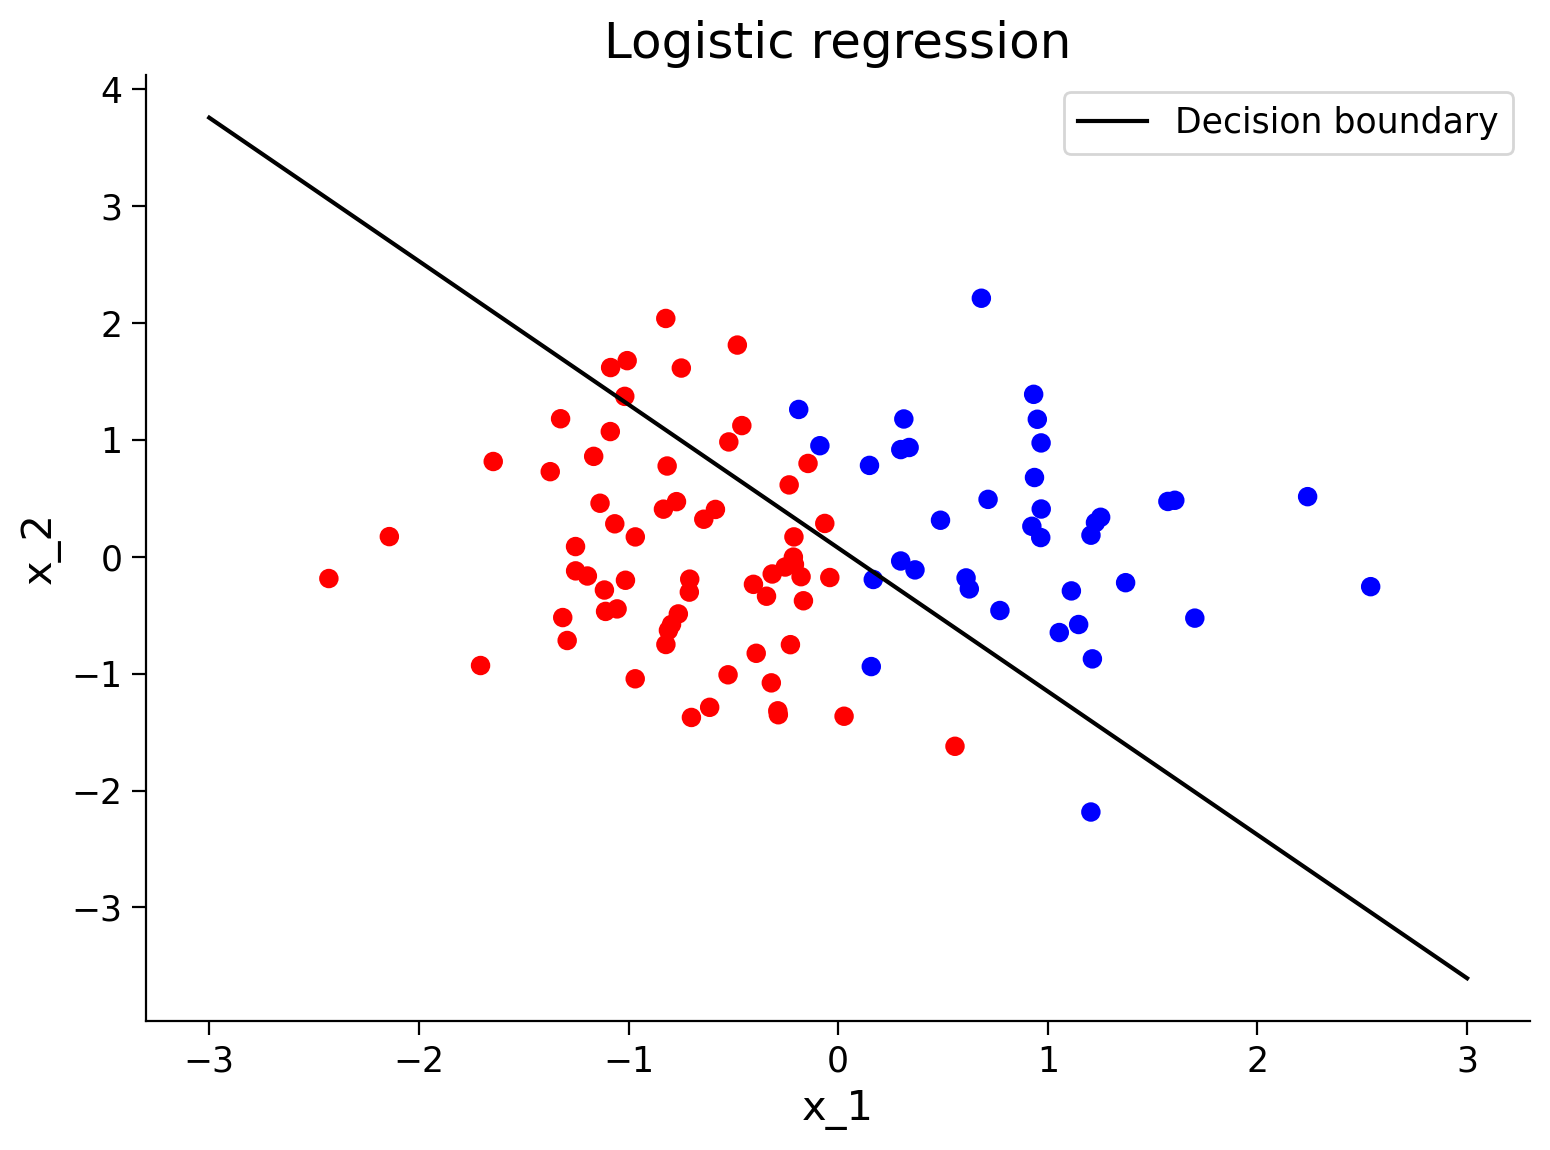

In [36]:
# visualize decision boundary relative to this new data. What do you observe?
from matplotlib.colors import ListedColormap
colors = ['#FF0000', '#0000FF']
cmap = ListedColormap(colors)
# Compute the decision boundary
w = logreg_model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-3, 3)
yy = a * xx - (logreg_model.intercept_[0]) / w[1]

# Plot the data points with the decision boundary
fig,ax=plt.subplots()
ax.scatter(x_1_test2, x_2_test2, c=y_test2, cmap=cmap)
ax.plot(xx, yy, 'k-', label='Decision boundary')
ax.set_title('Logistic regression')
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.legend()



# **Summary** 
This tutorial covers two important regression techniques: linear regression and logistic regression. These techniques are widely used in climate science to analyze and make predictions on data related to weather patterns, climate change, and the impact of climate on ecosystems. Through generating synthetic datasets and fitting models, the tutorial provides an understanding of how these techniques can be used to analyze and make predictions on data. It emphasizes the importance of being cautious in making assumptions about the usefulness of models trained on specific data and the need to test models on new data.   

The takeaway for the audience is an understanding of the basics of linear and logistic regression and how to apply them to real-world data analysis problems.



